In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

In [3]:
# download an hour of RGB data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid="rabb")

In [5]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [6]:
# set up working with the tools by just making a shorter name for our future calls
at = aurorax.tools

In [7]:
# scale all the images
images_scaled = at.scale_intensity(data.data, min=10, max=120)

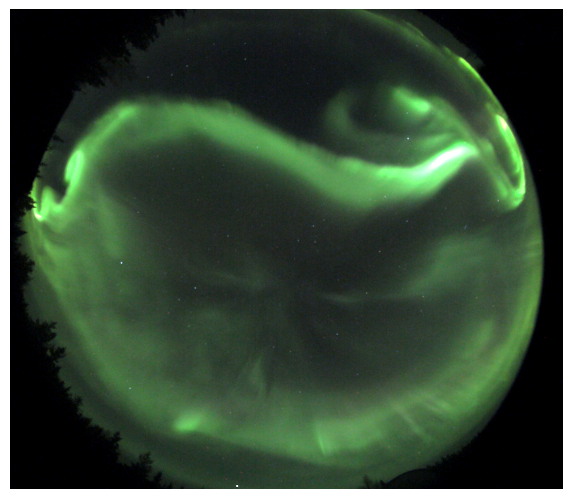

In [8]:
at.display(images_scaled[:, :, :, 600])

# Generate a keogram

In [9]:
images_scaled.shape

(480, 553, 3, 1200)

In [10]:
keogram = at.keogram.create(images_scaled, data.timestamp)

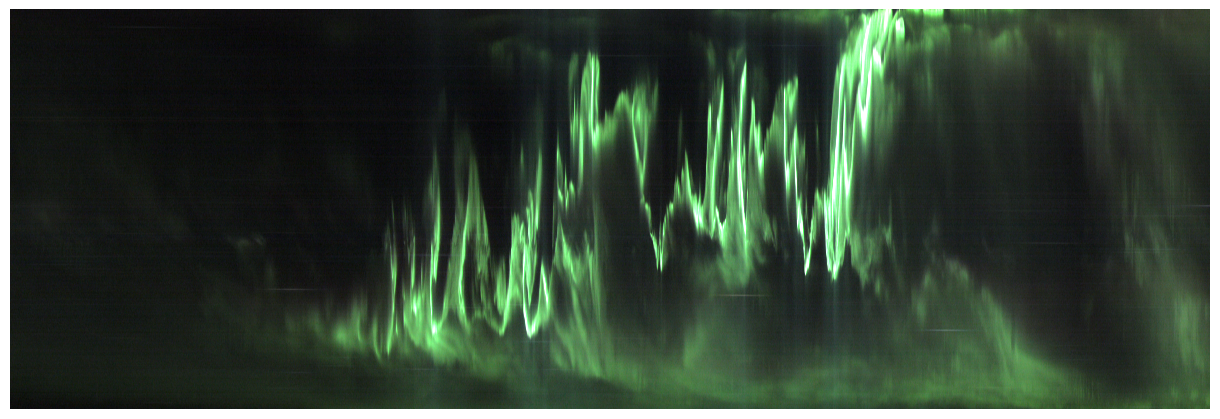

In [11]:
at.display(keogram.data, figsize=(12, 4), aspect="auto")

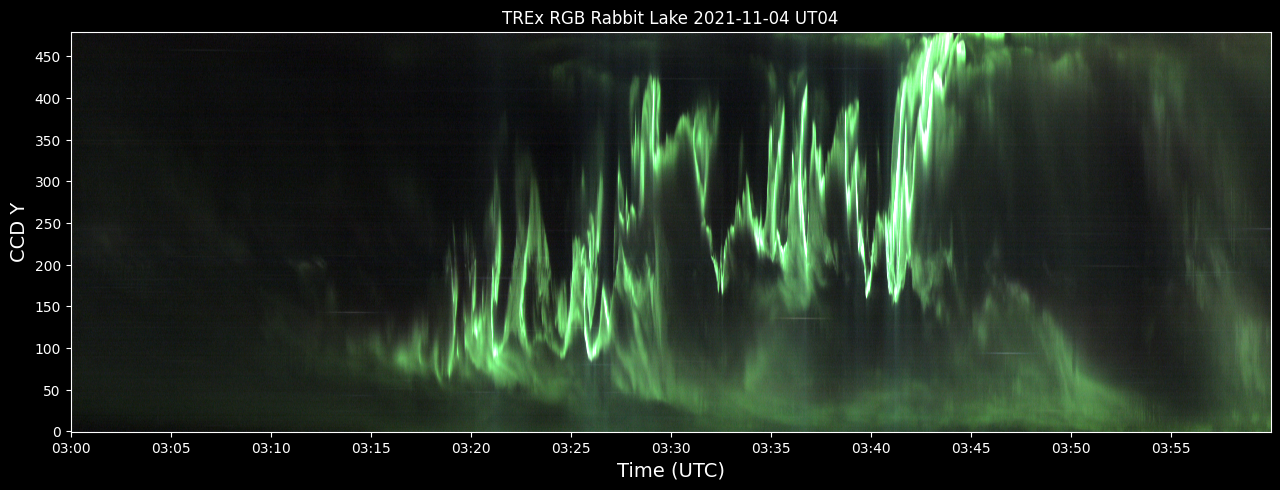

In [12]:
at.set_theme("dark")
plot_dt = start_dt  # this gets changed later, so we'll capture it now
keogram.plot(
    title="TREx RGB Rabbit Lake %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    aspect="auto",
)

# Reference in geographic coordinates

In [13]:
# download skymap files
start_dt = datetime.datetime(2020, 1, 1)
end_dt = datetime.datetime(2022, 1, 1)
r = aurorax.data.ucalgary.download("TREX_RGB_SKYMAP_IDLSAV", start_dt, end_dt, site_uid="gill", overwrite=True)
r.filenames

[PosixPath('/home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20200723/rgb_skymap_gill_20200723-+_v01.sav'),
 PosixPath('/home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20210726/rgb_skymap_gill_20210726-+_v01.sav'),
 PosixPath('/home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20211214/rgb_skymap_gill_20211214-+_v01.sav')]

In [14]:
# we want to use the second last one, since that's for the time period of the data we're looking at
skymaps = aurorax.data.ucalgary.read(r.dataset, r.filenames[-2])
skymaps.data[0].pretty_print()

Skymap:
  filename            : /home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20210726/rgb_skymap_gill_20210726-+_v01.sav
  full_azimuth        : array(dims=(480, 553), dtype=>f4)
  full_elevation      : array(dims=(480, 553), dtype=>f4)
  full_map_altitude   : array(dims=(3,), dtype=>f4)
  full_map_latitude   : array(dims=(3, 481, 554), dtype=>f4)
  full_map_longitude  : array(dims=(3, 481, 554), dtype=>f4)
  generation_info     : SkymapGenerationInfo(...)
  imager_uid          : rgb-04
  project_uid         : rgb
  site_map_altitude   : 0.0
  site_map_latitude   : 56.376724
  site_map_longitude  : 265.35632
  site_uid            : gill
  version             : v01


In [15]:
keogram.set_geographic_latitudes(skymaps.data[0], altitude_km=120)

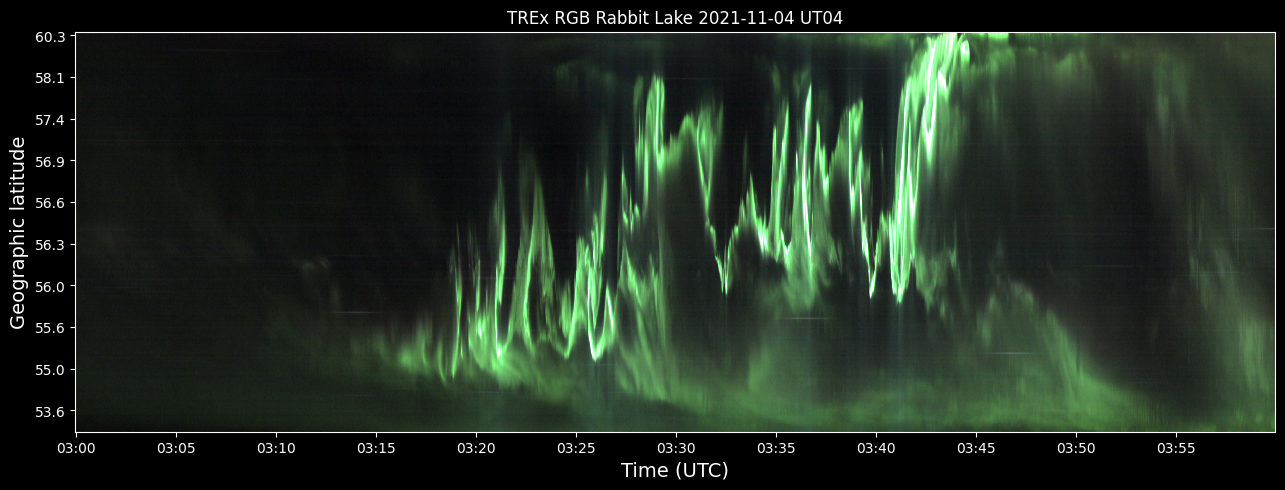

In [16]:
keogram.plot(
    figsize=(12, 4),
    y_type="geo",
    aspect="auto",
    title="TREx RGB Rabbit Lake %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
)

In [17]:
keogram.set_magnetic_latitudes(skymaps.data[0], plot_dt, altitude_km=120)

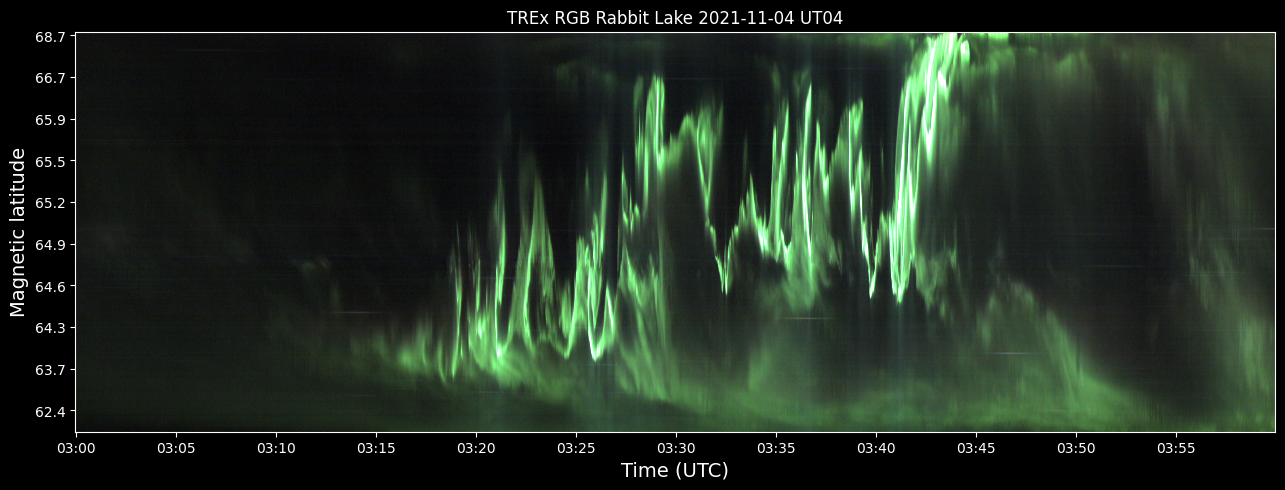

In [18]:
keogram.plot(
    figsize=(12, 4),
    y_type="mag",
    aspect="auto",
    title="TREx RGB Rabbit Lake %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
)